In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [91]:
churn_df = pd.read_csv(
    "Customer_Churn_Dataset.csv",
    index_col=0
)
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


So in order to classify which customers produce churn or not, we can normalize the data in each column to produce a neural network that classifies each customer as churn or not. We can take the following columns and convert them to normalized numbers

1. Gender
    - Male
    - Female
2. Partner
    - 

In [28]:
churn_df = pd.read_csv(
    "Customer_Churn_Dataset.csv",
    index_col=0
)
churn_df["gender"] = churn_df["gender"].astype("category").cat.codes.astype("float")
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].astype("category").cat.codes.astype("float")
churn_df["Partner"] = churn_df["Partner"].astype("category").cat.codes.astype("float")
churn_df["Dependents"] = churn_df["Dependents"].astype("category").cat.codes.astype("float")
churn_df["tenure"] = churn_df["tenure"]/72
churn_df["PhoneService"] = churn_df["PhoneService"].astype("category").cat.codes.astype("float")
churn_df["MultipleLines"] = churn_df["MultipleLines"].astype("category").cat.codes/2
churn_df["InternetService"] = churn_df["InternetService"].astype("category").cat.codes/2
churn_df["OnlineSecurity"] = churn_df["OnlineSecurity"].astype("category").cat.codes/2
churn_df["OnlineBackup"] = churn_df["OnlineBackup"].astype("category").cat.codes/2
churn_df["DeviceProtection"] = churn_df["DeviceProtection"].astype("category").cat.codes/2
churn_df["TechSupport"] = churn_df["TechSupport"].astype("category").cat.codes/2
churn_df["StreamingTV"] = churn_df["StreamingTV"].astype("category").cat.codes/2
churn_df["StreamingMovies"] = churn_df["StreamingMovies"].astype("category").cat.codes/2 
churn_df["Contract"] = churn_df["Contract"].astype("category").cat.codes/2
churn_df["PaperlessBilling"] = churn_df["PaperlessBilling"].astype("category").cat.codes.astype("float")
churn_df["PaymentMethod"] = churn_df["PaymentMethod"].astype("category").cat.codes/3
churn_df["MonthlyCharges"] = churn_df["MonthlyCharges"]/118.75
churn_df["TotalCharges"] = churn_df["TotalCharges"].replace([" "], "0")
churn_df["TotalCharges"] = churn_df["TotalCharges"].astype(float)/999.9

# Target
churn_df["Churn"] = churn_df["Churn"].astype("category").cat.codes.astype("float")

In [29]:
x = churn_df[
    [
        "gender",
        "SeniorCitizen",
        "Partner",
        "Dependents",
        "tenure",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
        "MonthlyCharges",
        "TotalCharges"
    ]
].values
Y = churn_df["Churn"].values

In [80]:
from keras import models
from keras import layers
from keras import optimizers
max_epochs = 50
batch = 32

In [86]:
percent_split = .7
train_idx = round(x.shape[0]*percent_split)
x_train = x[:train_idx]
x_val = x[train_idx:]
y_train = Y[:train_idx]
y_val = Y[train_idx:]

In [87]:
model_1 = models.Sequential()
model_1.add(layers.Dense(8, activation = 'relu', input_shape = (19,)))
# model_1.add(layers.Dense(3, activation = 'relu'))
# model_1.add(layers.Dense(3, activation = 'relu'))
model_1.add(layers.Dense(1, activation = 'sigmoid'))
model_1.compile(
    optimizer = optimizers.RMSprop(lr = 0.001), 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)
history_1 = model_1.fit(
    x_train, 
    y_train, 
    epochs = max_epochs, 
    batch_size = batch, 
    validation_data = (x_val, y_val), 
    verbose = 0
)

In [88]:
epochs = range(1, max_epochs + 1)
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
train_accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']

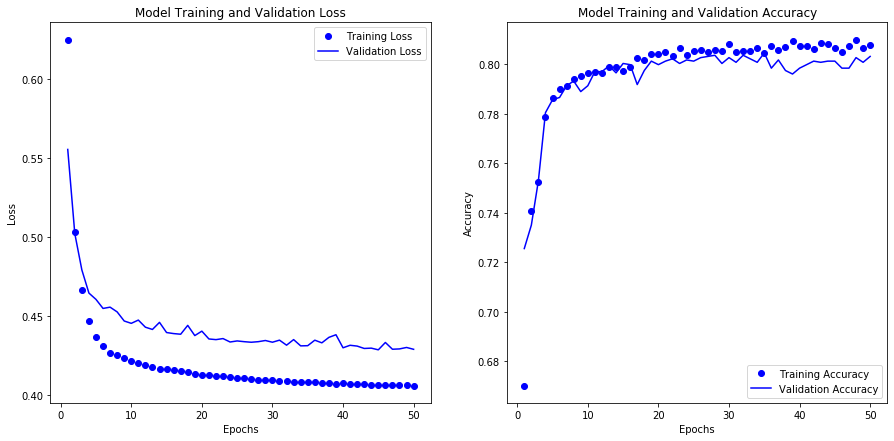

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(epochs, train_loss, 'bo', label = "Training Loss")
ax[0].plot(epochs, val_loss, 'b', label = "Validation Loss")
ax[0].title.set_text("Model Training and Validation Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(epochs, train_accuracy, 'bo', label = "Training Accuracy")
ax[1].plot(epochs, val_accuracy, 'b', label = "Validation Accuracy")
ax[1].title.set_text("Model Training and Validation Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

In [90]:
ra = model_1.evaluate(x_train, y_train)
ra

4930/4930 [==============================] - 0s 20us/step


[0.40467611222431576, 0.8079107403755188]